In [10]:
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
engine = create_engine(URL(
    user='baopham',
    password='Ngoc738218',
    account='gz74928.west-europe.azure',
    warehouse='COMPUTE_BAO',
    database='WILDWEST_9',
    schema='PROCESSED'
))

query = "select * from final_table"
df = pd.read_sql(query, engine)
df.head(5)

,con_cst,con_timestamp,term_st,term_cntry,type,bill_num,org_num,term_num,local_sw_id,rev_amt,rev_total_sec
0,19,1999-03-12 10:42:30,,CN,residental,4065430005,4065430005,9815410005,26,13.86,1.414141e+121
1,18,1999-03-03 10:13:30,,NO,residental,4153690299,4153690299,9838810299,26,29.95,2.323232e+121
2,10,1999-04-01 12:05:47,,GU,residental,8188520307,8188520307,9989610307,05,7.07,6.767677e+121
3,29,1999-02-19 02:32:01,,JA,residental,4153690102,4153690102,9828810102,11,9.90,1.111111e+121
4,12,1999-01-12 13:14:37,,AU,residental,8188520052,8188520052,9849610052,69,43.45,3.232323e+121


In [12]:

df['term_st'] = df['term_st'].str.strip()
df['term_cntry'] = df['term_cntry'].str.strip()


total_revenue_state = df[df['term_st'].str.len() == 2]['rev_amt'].sum()

# Calculate the total revenue for rows where TERM_ST is not exactly two characters (revenue attributed to TERM_CNTRY)
total_revenue_country = df[df['term_st'].str.len() != 2]['rev_amt'].sum()

# Output the results
print(f"Total Revenue for State: ${total_revenue_state:,.2f}")
print(f"Total Revenue for Country: ${total_revenue_country:,.2f}")

Total Revenue for State: $1,983,780.69
Total Revenue for Country: $5,185,649.22


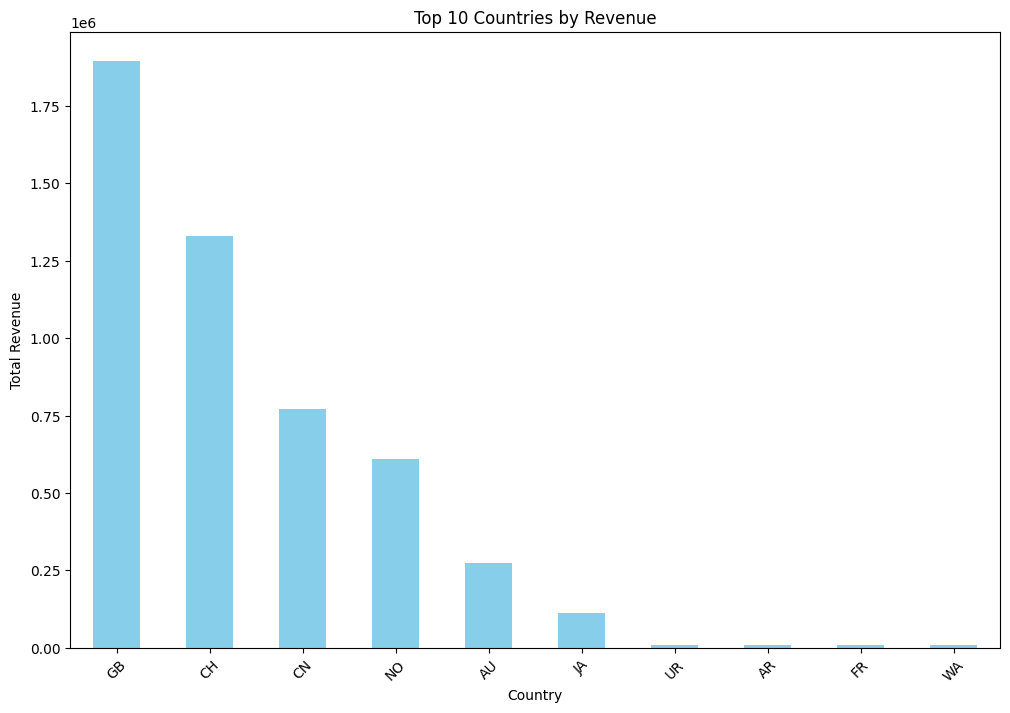

In [13]:
# Filter and group the data to find the top 10 countries by revenue
top_10_countries_revenue = df[df['term_st'].str.len() != 2].groupby('term_cntry')['rev_amt'].sum().sort_values(ascending=False).head(10)

# Visualization using matplotlib
plt.figure(figsize=(12, 8))
top_10_countries_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

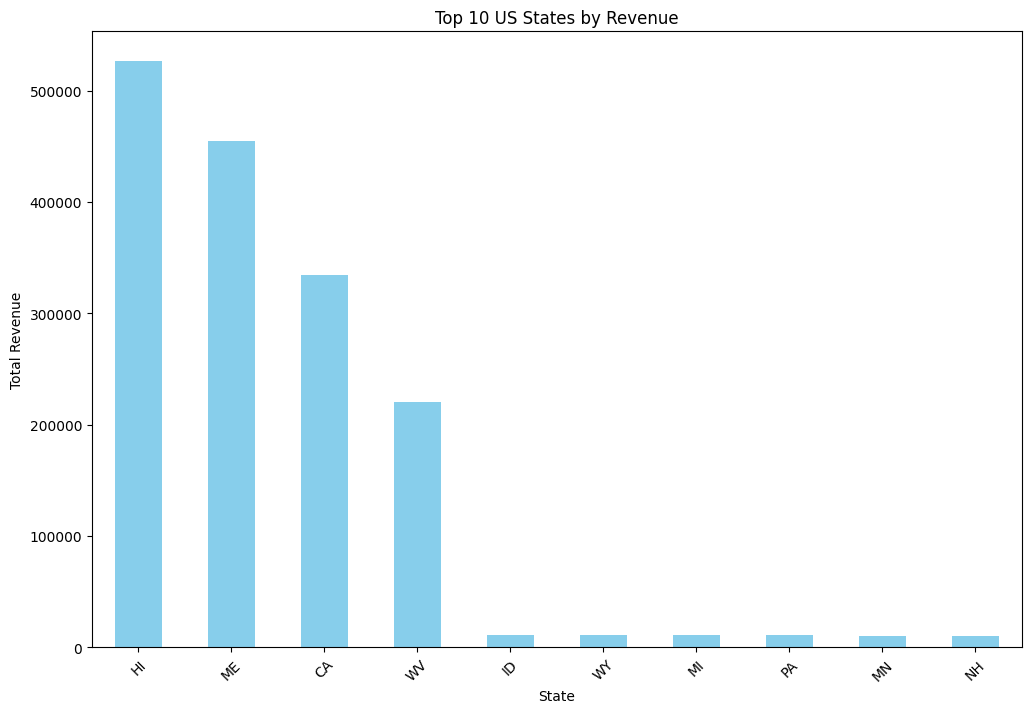

In [14]:
top_10_states_revenue = df[df['term_st'].str.len() == 2].groupby('term_st')['rev_amt'].sum().sort_values(ascending=False).head(10)

# Visualization using matplotlib
plt.figure(figsize=(12, 8))
top_10_states_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 US States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

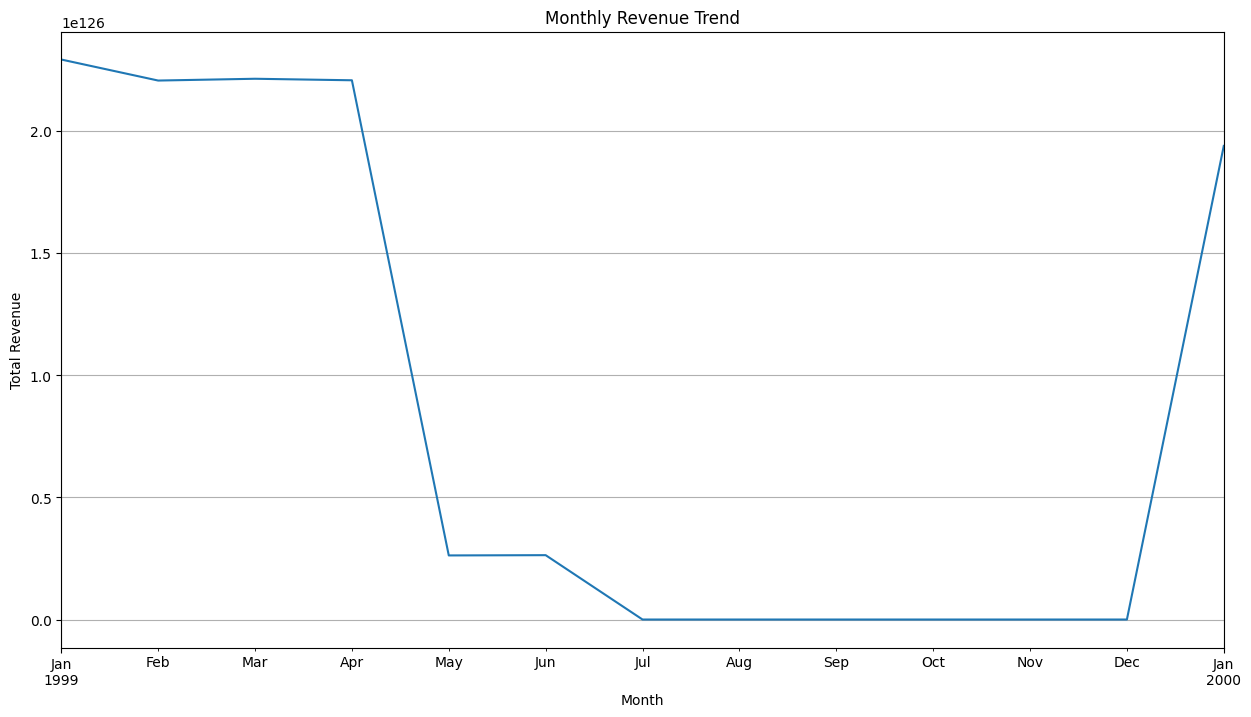

In [15]:
monthly_revenue = df.resample('M', on='con_timestamp')['rev_amt'].sum()

# Visualization
plt.figure(figsize=(15, 8))
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

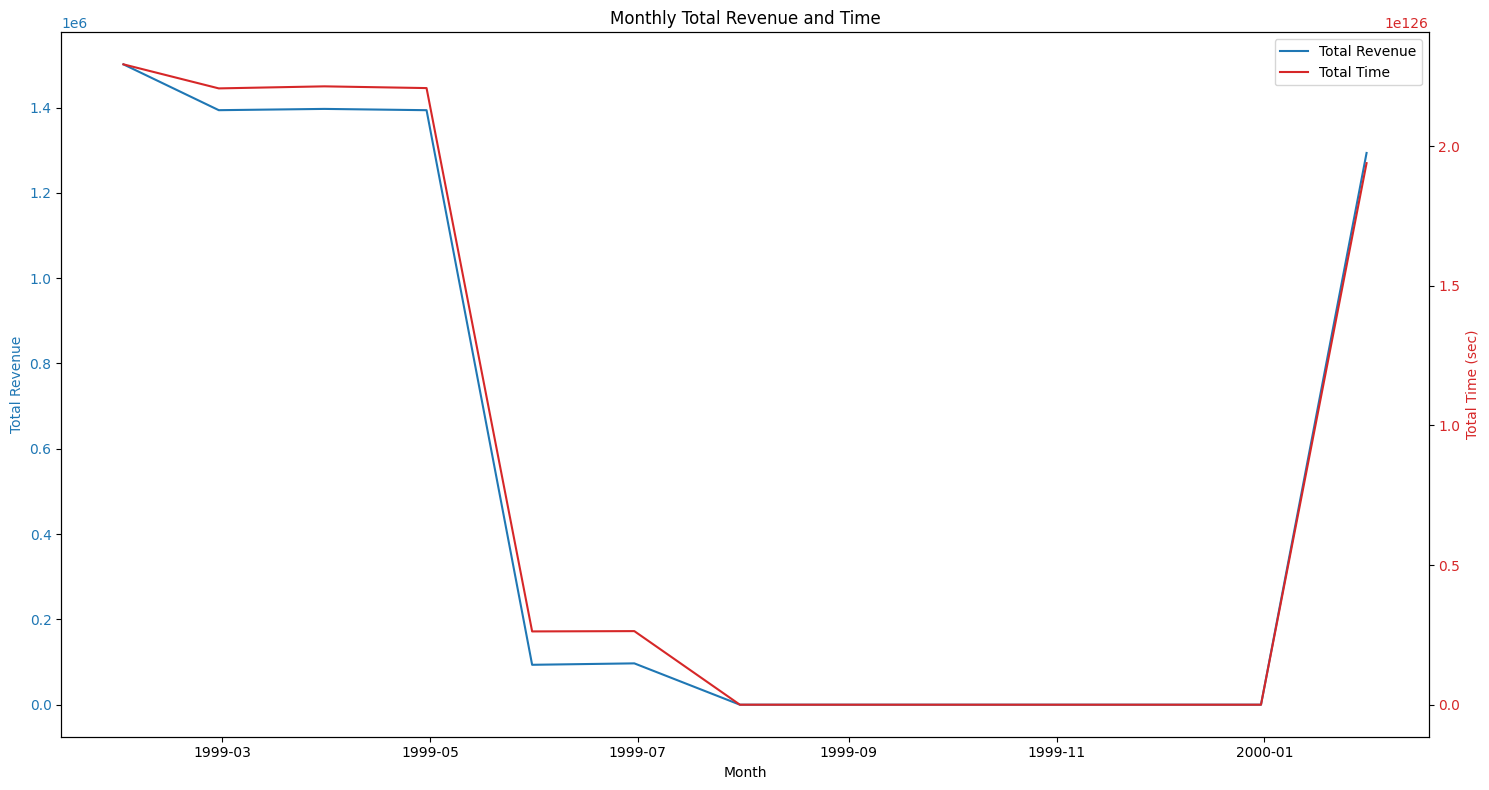

,rev_amt,rev_total_sec
con_timestamp,,
1999-01-31,1501217.34,2.292393e+126
1999-02-28,1393773.03,2.206312e+126
1999-03-31,1396755.70,2.213642e+126
1999-04-30,1393752.24,2.207436e+126
1999-05-31,93558.40,2.623657e+125
1999-06-30,96902.60,2.634384e+125
1999-07-31,0.00,0.000000e+00
1999-08-31,0.00,0.000000e+00
1999-09-30,0.00,0.000000e+00


In [28]:
#sum revenue and total time on a monthly
monthly_data = df.resample('M', on='con_timestamp').agg({'rev_amt': 'sum', 'rev_total_sec': 'sum'})

# Visualization
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color=color)
line1, = ax1.plot(monthly_data.index, monthly_data['rev_amt'], color=color, label='Total Revenue')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for total time
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Time (sec)', color=color)
line2, = ax2.plot(monthly_data.index, monthly_data['rev_total_sec'], color=color, label='Total Time')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Total Revenue and Time')
fig.tight_layout()

# Adding a legend
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])


plt.show()
monthly_data